In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [15]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [64]:
df_ROS_forpatient = df_ROS[['성별', '신장','심혈관질환', '체중','흡연여부','연령','직업','혈액형','재발여부']]

# 1.목표변수 설정 ex)재발여부가 목표변수
# 2.non- null 전처리 필요 (확인이 필요)

In [65]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [18]:
## 전처리 확인필요  : 대상 컬럼에 의한 레코드 삭제 시 데이터셋의 양이 통계적인 분포도에 너무 적지 않은지 고려 
## 최소 50개 이상.
## 날짜가 들어가지 않으면 200~500개 사이면 삭제해도 가능
## 단)날짜가 들어갈 시 , 데이터양이 더 많아야 함 
df_ROS_forpatient = df_ROS_forpatient.dropna()
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계  확인 필요 (스토리)
- 목표변수 : '재발여부' - 분포 언발란스 (연속형: 정규화 확인, 범주형: 밸런스 확인유무) 
- 설명변수: 
    - '성별'     : 남성 발생율이 높은 것 같음 
    - '신장'     : 목표변수 대변 분포 변화 적음. 
    - '심혈관질환': 질환자는 재발율이 상대적으로 높다.
    - '체중'     : 몸무게 차이에 따라 분포 변화 영향 있음. //체중을 줄이기 위해 필요한 것은 외부에서 가져와야 한다. 
    - '흡연여부' : 흡연자는 재발율이 상대적으로 높다. 
    - '연령'     : 상대적으로 나이가 많으면 발생율이 높은 것으로 보임. 
    - '직업'     : 건설업/ 수산업자  분들의 발생율이 상대적으로 높은 것으로 보임. 
    - '혈액형'   : 차이에 여부 확인 필요 (확증 데이터 분석) 
    - ※ 재발율을 줄이기 위해 조심해야 될 것을 정해야함. 증명은 통계적 수치를 보여주면 됨.

- 분석스토리 : 재발방지를 위해 이런건 줄이고 조심하고 늘려야한다는 스토리 필요 

<Axes: xlabel='재발여부', ylabel='count'>

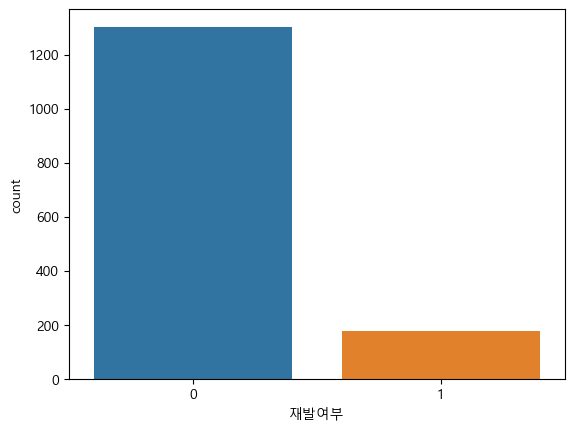

In [21]:
### 데이터 타입과 분포 
## 목표변수 확인 필요 : 대부분 범주형 why? 예측률이 높아야 하기에 분류를 많이 함. 
sns.countplot(data=df_ROS_forpatient, x= '재발여부')

In [22]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [ ]:
## 성별: 범주형  / 따라서 성별을 int 에서 - object로 변환 필요 
## 심혈관질환: 

In [30]:
# object (범주형) 변환 대상 : 성별, 심혈관질환(2개), 흡연여부, 재발여부 
# df_ROS_forpatient['심혈관질환'].value_counts()
# 변환시, 주의할 점 
df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [33]:
forpatient_list = df_ROS_forpatient.describe().columns.to_list()
forpatient_list
# x가: 연속형 / y가: 범주형 일때 그릴 수 있는 것 = 그릴 수 있는 것은 정해져 있다. 

['신장', '체중', '연령']

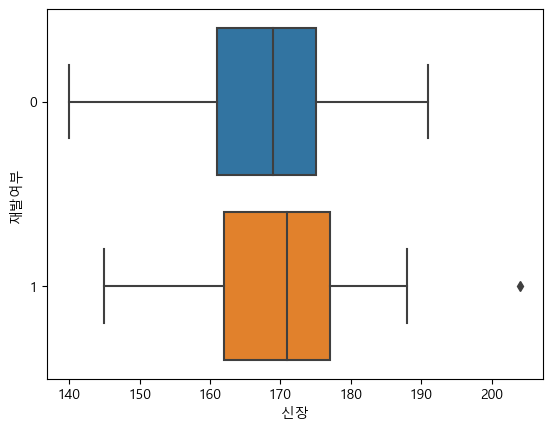

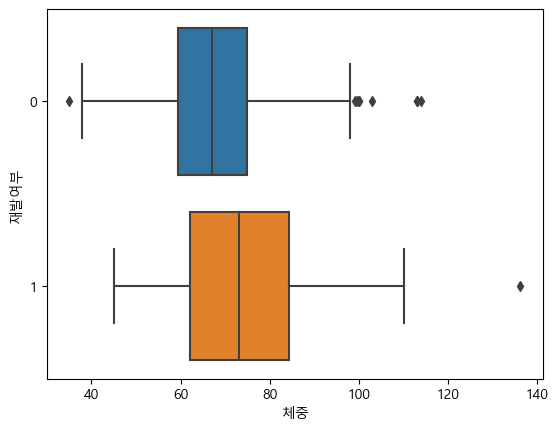

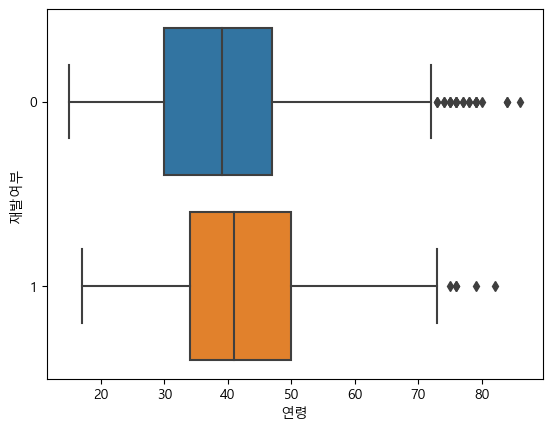

In [61]:
## x:연속형이고/ y가 범주형인 경우, boxplot/barplot으로 그리면 됨 
## 재발여부에 따라 하느냐 안하느냐에 따라 나뉘어져 있음.
# 요약 :  sns.boxplot(data=df_ROS_forpatient, x=item, y='재발여부' , orient ='h')
for item in forpatient_list:
    sns.boxplot(data=df_ROS_forpatient, x=item, y='재발여부', orient ='h')  # $ 기호 없이 item만 사용
    plt.show()

In [48]:
## x: 범주형 / y: 범주형 데이터 분석 
## 단) 재발여부는 출력시킬 필요가 없기에, drop 필요 : 칼럼을 drop 
## 우리가 원하는 것은 objcet type에서만 삭제 해야함. descript로 삭제 하는 것이 더 쉬움
#df_ROS_forpatient.drop(columns=['재발여부']) 
forpatient_object_list = df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_object_list

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

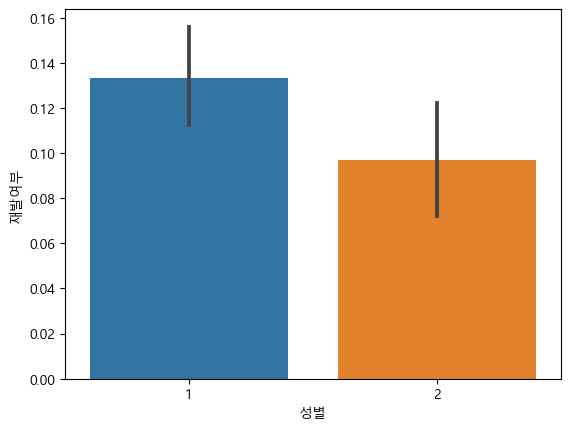

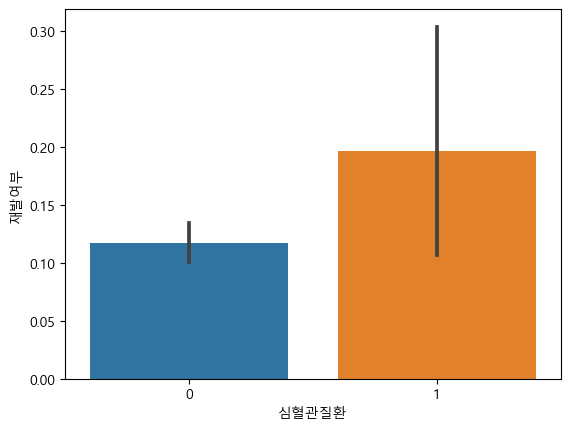

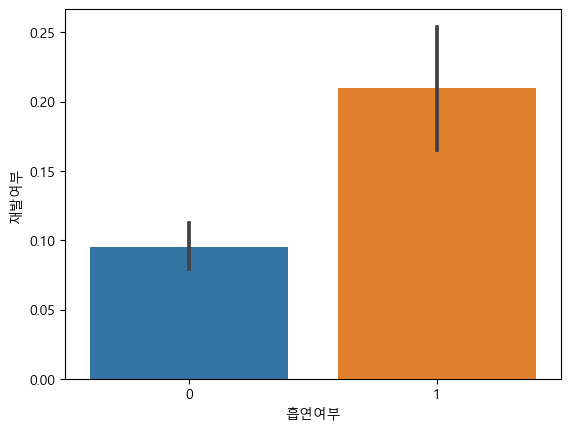

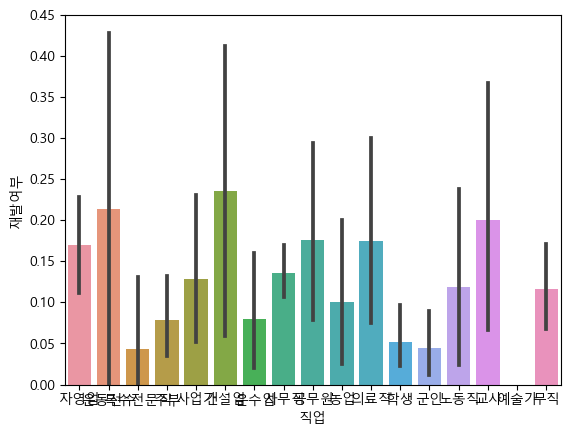

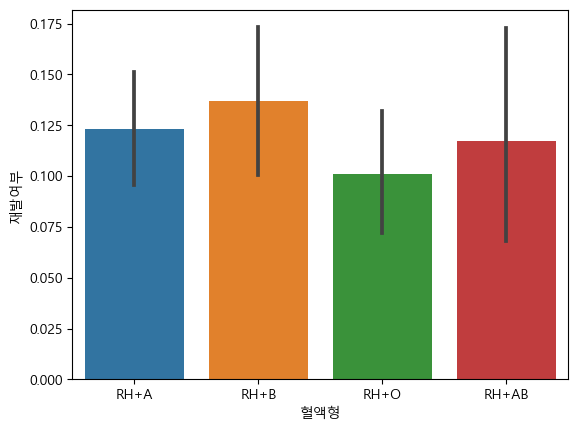

In [57]:
## 범주형 + 범주형을 시각화 할때, 적당한 것은 ? =bar
for item in forpatient_object_list:
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')
    plt.show()

In [58]:
## 혈액형 : 혈액형 제일 낮은 'O' 형과  가장 높은 'B' 형의 차이를 구해야함 . = 척추 관련 질환
##  직업 : 상위10개 , 하위 10개를 극과 극을 뽑아서 차이 여부 진행해야함. = 척추관련 질환 